In [4]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('/content/climate_change.csv')
df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [6]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=0)

In [7]:
len(train_data)

246

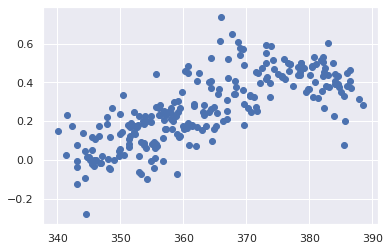

In [10]:
X = train_data.iloc[:,3]
Y = train_data.iloc[:,10]

plt.scatter(X, Y, cmap='Greens_r')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


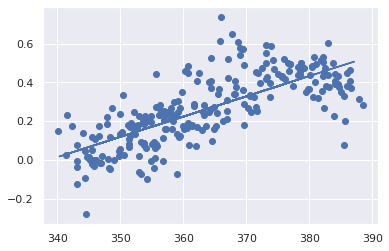

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X[:, np.newaxis], Y)

xfit = test_data.iloc[:,3]
yfit = model.predict(xfit[:, np.newaxis])


plt.scatter(X, Y)
plt.plot(xfit, yfit)

In [13]:
#R-square score
X_test = test_data.iloc[:,3]
Y_test = test_data.iloc[:,10]

model.score(xfit[:, np.newaxis], Y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


0.6203938569860509

In [14]:
model.coef_

array([0.01046908])

In [15]:
model.intercept_

-3.5455934504920914

In [16]:
arr = model.predict(X_test[:, np.newaxis])
arr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


array([0.12549318, 0.39004676, 0.44459065, 0.1615068 , 0.30828327,
       0.26274278, 0.5076145 , 0.10895203, 0.08361687, 0.12015395,
       0.4213493 , 0.15051427, 0.34356406, 0.10999894, 0.09408594,
       0.32011332, 0.39580475, 0.36984144, 0.32409157, 0.37654165,
       0.33801544, 0.04739386, 0.13522942, 0.16234433, 0.31048177,
       0.09293435, 0.16025051, 0.37894954, 0.26693041, 0.16967268,
       0.32639477, 0.38554506, 0.24086241, 0.41035677, 0.35361437,
       0.21908673, 0.32042739, 0.40899579, 0.21688822, 0.33487472,
       0.0821512 , 0.10842858, 0.21845858, 0.03148086, 0.19626414,
       0.05629258, 0.17752449, 0.29331248, 0.19626414, 0.34712354,
       0.29320779, 0.27750418, 0.33330436, 0.01703354, 0.15690041,
       0.20045177, 0.37099304, 0.09816888, 0.21856327, 0.08853733,
       0.07733542, 0.40763481])

In [17]:
test = Y_test.to_numpy()
test

array([ 0.154,  0.519,  0.362,  0.013,  0.366,  0.176,  0.278,  0.12 ,
       -0.042,  0.027,  0.425,  0.278,  0.289,  0.314, -0.032,  0.212,
        0.418,  0.462,  0.498,  0.419,  0.322,  0.034,  0.271,  0.175,
        0.159,  0.065,  0.167,  0.514,  0.13 ,  0.242,  0.261,  0.455,
        0.218,  0.56 ,  0.568,  0.093,  0.282,  0.408,  0.141,  0.413,
        0.25 ,  0.149,  0.089, -0.035,  0.175,  0.089,  0.156,  0.254,
        0.088,  0.417,  0.223,  0.486,  0.362,  0.093,  0.224,  0.199,
        0.442,  0.049,  0.125,  0.065, -0.155,  0.38 ])

In [18]:
from scipy import stats

CATEGORICAL_VARIABLES = ['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']
for i in CATEGORICAL_VARIABLES:
  correlation = stats.pointbiserialr(df[i], df["Temp"])
  print(i, correlation)


MEI PointbiserialrResult(correlation=0.13529168433351066, pvalue=0.017518659805993233)
CO2 PointbiserialrResult(correlation=0.7485046457380211, pvalue=1.557880415620173e-56)
CH4 PointbiserialrResult(correlation=0.6996965803638929, pvalue=1.3362989047670364e-46)
N2O PointbiserialrResult(correlation=0.7432418337360966, pvalue=2.3517474412415498e-55)
CFC-11 PointbiserialrResult(correlation=0.3801113416532199, pvalue=5.031362179050227e-12)
CFC-12 PointbiserialrResult(correlation=0.6889441088656743, pvalue=1.1179206572557341e-44)
TSI PointbiserialrResult(correlation=0.18218560682875684, pvalue=0.0013215404069405788)
Aerosols PointbiserialrResult(correlation=-0.392069446275214, pvalue=9.283071094401667e-13)


In [19]:
#Sort variables based on p-value and determine the gas that affects the temperature the most
#which is the most dangeropus green house